# Introduction to numerical differentiation - AMATH 301

This week we will begin discussing the concept of **numerical differentiation**. In your past experience with derivatives, you had some function, e.g., $f(x) = \sin(x)$, and you were able to compute that $f'(x) = \cos(x)$ exactly. That is not how we do *numerical differentiation.* I know that some people are used to online derivative calculations that **will** do that for you. In fact, you could have python do that for you. Such computations are called *symbolic* computations because taking a derivative like that is just moving symbols around. Symbolic computation is very limited for a few reasons and those will be the things that we focus on.

We will look at this concept from two slightly different angles.  One possibility is that we are given some function $f(x)$ and a point $x_0$ and we want to compute the derivative of $f$ at $x_0$.  That is, we want to find $f'(x_0)$. If $f$ is relatively simple (as given above), then we already know how to do this from calculus, so we will generally assume that $f$ is either very complicated or that we do not have access to the formula (otherwise there would be no need to use a computer).  (For instance, we might be given a python function but not be able to read the code.)  The other (very common) possibility is that we are given a set of data points $(x_0, y_0)$, $(x_1, y_1)$, $\dotsc$, $(x_N, y_N)$ and we want to find out how fast the data points are changing at one of the points $(x_k, y_k)$. For instance, salinity gradients (changes in salinity) in water can be used to generate energy. If we measure the salinity of a column of water we will get different values of the salinity throughout that column. It may be important for us to know what the instantaneous rate of change, i.e., the derivative, is at a particular location in that water column. This involves a numerical derivative.

These two situations are not as different as they might sound, and it is easy to convert back and forth between them.  If you are given a function $f(x)$, then you can simply plug in the numbers $x_0$, $x_1$, $\dotsc$, $x_N$ to obtain all the necessary $y$-values and then forget about the function.  Likewise, if you have a set of data, you can simply pretend that all of the $y$-values arose from some function $f(x)$, even if you don't know the formula.  

Both approaches are useful, but for different reasons.  From a theoretical point of view, it really only makes sense to talk about the derivative of a function.  There is no good rigorous definition of a derivative on a discrete set of points.  We will therefore always assume that we have a function $f(x)$ when working by hand.  However, in real world applications we almost never have access to the true formula that produced our data.  Instead, we have a set of data points and it is either expensive or impossible to collect any more (for instance, salinity in the ocean is measured by [argo robots](https://argo.ucsd.edu/) ).  When writing code, we will therefore almost always assume that we have a fixed set of $x$ and $y$ values, even if we really do know the function involved.  

To motivate how we do numerical differentiation, we are going to go back to how you learned it in calculus. We will first look at some figures.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

Let's start with a function we know, $f(x) = \sin(x)$. 

In [34]:
f = lambda x: np.sin(x);
xplots = np.linspace(-np.pi, np.pi, 1000)

(-2.0, 2.0)

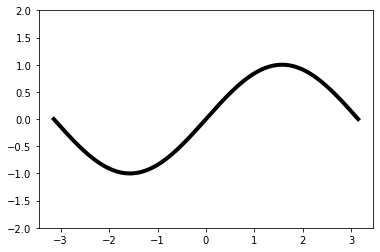

In [35]:
fig, ax = plt.subplots()
ax.plot(xplots, f(xplots),'k', linewidth=4)
ax.set_ylim([-2, 2])

We are going to start by thinking about finding the derivative at a single point, $x_0$. 

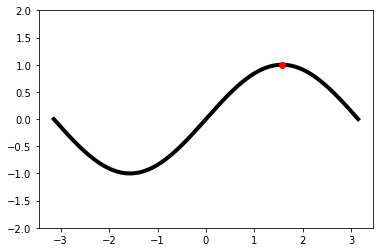

In [36]:
x0 = np.pi/2
ax.plot(x0, f(x0), 'ro')
fig

## Approximating the tangent line with the secant line

Recall that the derivative of the function at the point $x_0$ is defined as the slope of the tangent line at the point $x_0$. To get the slope of the tangent line, we first look at the *secant line* which is the line between two points on the curve. We will look at the secant line between the point $x_0$ and the point $x_0 + \Delta x$, where $\Delta x$ is a small number. The formula for the slope of the secant line between the points $x_0$ and $x_0 + \Delta x$ is
$$ m = \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}.$$
The formula for the secant line itself is found using the point-slope form equation,
$$ y = m(x-x_0) + f(x_0).$$

The tangent line is the secant line in the limit $\Delta x \to 0$. We are going to look at smaller and smaller $\Delta x$ to get closer and closer to the tangent line.

We are going to plot these for all $x$, so let's make an anonymous function that finds the secant line.

Recall that I quickly introduced anonymous functions last week in class. Anonymous functions are just like mathematical functions. So if I have the function

$$ S(\Delta x) = \frac{f(x_0+\Delta x) - f(x_0)}{\Delta x},$$

which tells me the slope of the secant line through the point $x = x_0$ and $x = x_0 + \Delta x$ for the function $f(x)$, then I can implement that using the following *anonymous function*.

In [37]:
secant_line_slope = lambda deltax: (f(x0+deltax) - f(x0))/deltax # Slope of the secant line between 
                                                                  # the point 'x' and 'x0+deltax'

In [39]:
secant_line_slope(3) # Delta x = 3

-0.6633308322001484

Notice the syntax `lambda deltax` meaning that `deltax` is the variable I will be plugging in for.

I can then use point-slope form to create a linear function of $x$ which is the secant line through the points $x=x_0$ and $x=x_0 + \Delta x$,

$$ T(x, \Delta x) = S(\Delta x)(x-x_0) + f(x_0),$$

which is implemented using an anonymous function by the following.

In [40]:
secant_line = lambda x, deltax: secant_line_slope(deltax)*(x-x0) + f(x0)

Notice that this function has two variables, $x$ and $\Delta x$, so the anonymous function also has two variables, implemented with `lambda x, deltax:`. 

Let's plot it for $\Delta x = 1$ first, it's kind of small.

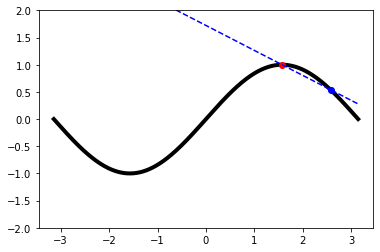

In [41]:
deltax = 1
ax.plot(x0+deltax, f(x0+deltax), 'bo')
ax.plot(xplots, secant_line(xplots, deltax), 'b--')
fig

Let's plot it for something smaller, $\Delta x = 0.5$.

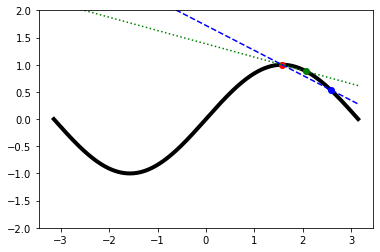

In [42]:
deltax = 0.5
ax.plot(x0+deltax, f(x0+deltax), 'go')
ax.plot(xplots, secant_line(xplots, deltax), 'g:')
fig

This is closer, but it's still too big if we want to think about this as an approximation to the tangent line. Let's go even smaller.

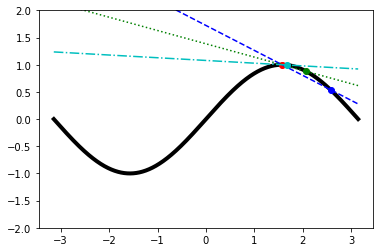

In [43]:
deltax = 0.1
ax.plot(x0+deltax, f(x0+deltax), 'co')
ax.plot(xplots, secant_line(xplots, deltax), 'c-.')
fig

Okay, this is really close... but is it the tangent line? If we zoom in we see that we actually aren't even that close. Let's go even smaller!

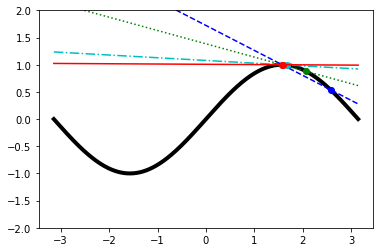

In [44]:
deltax = 0.01
ax.plot(x0+deltax, f(x0+deltax), 'ro')
ax.plot(xplots, secant_line(xplots, deltax), 'r')
fig

We see that this still isn't enough. We will never get there, that is the nature of the limit. 

### Forward difference scheme
The definition of the derivative at the point $x_0$ is 
$$ f'(x_0) = \lim_{\Delta x \to 0} \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}.$$
We just saw that on the computer we cannot take that limit. We can only approximate it. That's because we always need to choose a nonzero $\Delta x$.

This leads to our first, simple, way to calculate the derivative function $f'(x)$. We just use replace $x$ with $x_0$ in the above formula, and get rid of the limit by instead using a small $\Delta x$. 
$$ f'(x) \approx \frac{f(x+\Delta x)-f(x)}{\Delta x}.$$

It should be obvious from the definition of a limit that this is a valid approach.  If we choose too large a $\Delta x$ then we may get a bad approximation, but as we shrink $\Delta x$ we will necessarily get closer and closer to the true value of $f'(x)$.  Approximations of this form are called *difference schemes*, and this particular one is a *forward difference scheme*. The word "forward" refers to the fact that we are evaluating $f$ at the point $x$ that we care about and another point $x + \Delta x$ ahead of that point.  If you were standing on the number line at $x$, then you would have to look forward to see $x + \Delta x$. 

Since this is an *approximation* (it is not exact because we removed the limit), we would like to quantify the error. 

Let's first do this at the point $x_0 = \pi/2$. We know that if we choose a smaller $\Delta x$, we will be closer to the true derivative. We want to keep track of how the error changes as we decrease $\Delta x$. Let's look at the error as we change $\Delta x$ and look at the error at $x_0 = \pi/2$. We know that $f'(\pi/2) = \cos(\pi/2) = 0$, so we will use that for calculating the error.

Let's look at the error for the small $\Delta x$ values $[0.1, 0.01, 0.001, 0.0001]$. These points are *logarithmically* spaced. In other words, they are of the form $[10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$. We can create these points using `np.logspace`. Points like this are useful for determining how error changes as your *step size* ($\Delta x$) changes.

In [45]:
# First define the vector of h values we will look at
deltax_vals = np.logspace(-1, -4, 4) # When using logspace, you specify the power, not the values
print(deltax_vals)

[0.1    0.01   0.001  0.0001]


In [47]:
true_deriv = 0 # This is the true value of the derivative at x0 = pi/2.
for deltax in deltax_vals: # Loop over the deltax_vals
    approx = secant_line_slope(deltax) # This is our approximation for the derivative
    print("Error for Delta x = " + str(deltax) + " is " + str(np.abs(approx - true_deriv)))

Error for Delta x = 0.1 is 0.049958347219742905
Error for Delta x = 0.01 is 0.004999958333473664
Error for Delta x = 0.001 is 0.0004999999583255033
Error for Delta x = 0.0001 is 4.999999969612645e-05


We see a steady decrease of the error. We want to quantify that decrease. Does it have a pattern? It looks like it to me. It is decreasing by a power of 10 each time we decrease $\Delta x$ by a power of 10. 

Another way to think about this is that we are asking the question "How quickly do we converge to the true value $f'(x)$ as we shrink $\Delta x$?"  That is, if we choose some small $\Delta x$ then there will be some error between our approximation and the real $f'(x)$.  If we choose a $\Delta x$ that is ten times smaller, what will happen to our error?

To explain this, we are going to need to use *Taylor Series.* I know not everyone has seen Taylor series and even those who have seen Taylor series probably don't remember them too well or see why they are important. Let me tell you, **Taylor Series** are probably the most useful mathematical tool you have learned so far - they show up everywhere.

## Taylor series

For this class, we will be using only simple **Taylor series expansions**, in particular, we will use

$$f(x + \Delta x) = f(x) + \Delta x f'(x) + \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{3!}f'''(x) + ... + \frac{(\Delta x)^n}{n!}f^{(n)}(x) + ...$$

(here $f^{(k)}(x)$ means the $k$-th derivative of the function). For this equation to be an equality, we need infinitely many terms.  Of course, the whole point of using a difference scheme was so that we could avoid doing something infinitely many times.  Fortunately, when $\Delta x$ is small, $(\Delta x)^2$ or $(\Delta x)^3$ or $(\Delta x)^n$ will be *much* smaller.  This means that, as long as $\Delta x$ is small enough, we can safely ignore the terms with higher powers because they are very close to zero.  We will use the notation $\mathcal{O}((\Delta x)^n)$ to indicate which terms we are ignoring.  The notation $\mathcal{O}((\Delta x)^n)$ means "terms that are as small or smaller than $((\Delta x)^n$". In other words, we could write

$$f(x + \Delta x) = f(x) + \Delta x f'(x) + \frac{(\Delta x)^2}{2}f''(x) + \mathcal{O}((\Delta x)^3) $$

where here

$$\mathcal{O}((\Delta x)^3) = \frac{(\Delta x)^3}{3!}f'''(x) + ... + \frac{(\Delta x)^n}{n!}f^{(n)}(x) + ...$$

Alternatively we could write

$$f(x + \Delta x) = f(x) + \Delta x f'(x) + \mathcal{O}((\Delta x)^2) $$

where here

$$\mathcal{O}((\Delta x)^2) = \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{3!}f'''(x) + ... + \frac{(\Delta x)^n}{n!}f^{(n)}(x) + ...$$

In other words, $\mathcal{O}(\Delta x^n)$ represents a polynomial where the smallest power of $\Delta x$ is $n$. Notice that the definition of the $\mathcal{O}$ terms can change depending on the context. This notation is context dependent, it depends on the problem you are working on and is really kind of just a book-keeping device for us.



We can therefore rewrite our Taylor expansion as

$f(x + \Delta x) = f(x) + \Delta xf'(x) + \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)$.  

If we substitute this into the formula for the Forward-Difference scheme, we get

$f'(x) \approx \frac{1}{\Delta x}\left[f(x + \Delta x) - f(x)\right]$

$\approx \frac{1}{\Delta x}\left[f(x) + \Delta xf'(x) + \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4) - f(x)\right]$

$= \frac{1}{\Delta x}\left[\Delta xf'(x) + \frac{(\Delta x)^2}{2}f''(x) + \frac{(\Delta x)^3}{6}f'''(x) + \mathcal{O}(\Delta x^4)\right]$

$= f'(x) + \frac{\Delta x}{2}f''(x) + \frac{(\Delta x)^2}{6}f'''(x) + \mathcal{O}(\Delta x^3)$.  

Notice that when $\Delta x$ goes all the way to zero, everything but the first term goes away and we are just left with $f'(x)$.  This is what we were trying to approximate in the first place, which is a good sign.  We say that the difference scheme is *consistent*, because in the limit as $\Delta x$ approaches zero it gives the correct value.  

Also note that when $\Delta x$ is very small, raising it to a power makes it even smaller.  In particular, $\Delta x^2$ and $\Delta x^3$ are much, much closer to zero than $\Delta x$.  This means that once $\Delta x$ is sufficiently small, we don't really need to worry about any of the higher powers of $\Delta x$.  We can therefore write (for sufficiently small $\Delta x$): 

$\frac{f(x + \Delta x) - f(x)}{\Delta x} \approx f'(x) + \frac{\Delta x}{2}f''(x)$.  

We call the second term in this equation the *leading error term*.  It tells us approximately how far off our approximation is from the true value of $f'(x)$.  Of course, we don't actually know $f''(x)$, so we don't know exactly what the error is.  However, we do know that the error is proportional to $\Delta x$ raised to the first power.  This means that if we shrink $\Delta x$ by a factor of ten, then the error will also shrink by a factor of ten.  Likewise, if we shrink $\Delta x$ by a factor of one hundred, then the error will also shrink by a factor of 100.  Because of this, we say that our difference scheme is first order.  We call the Forward-Difference scheme presented above a *first order forward difference scheme* for $f'(x)$, or that the scheme is an "order-1 scheme".  It is important to remember that the phrase "first order" in this name refers to the power of $\Delta x$ in the error, not to the fact that we are approximating a first derivative. 

### Taking the derivative of data

Therefore we see that
$$ \frac{f(x+h) - f(x)}{h} - f'(x) = \mathcal{O}(h). $$
**The error is $\mathcal{O}(h)$.** We say that the error is "order-h". (Note that I am going to start using $ h = \Delta x$ because it simplifies the writing). 

So what does this mean? This means as we decrease $h$, the error decreases by a factor of $h$. Above we decreasing $h$ by a factor of $10$ in the loop. We saw that the error decreased by a factor of $h$!

This method for computing the derivative is called the **forward-difference formula.** It is called *forward* difference because we are computing the derivative at the point $x$ by looking at $x+h$. Let's go ahead and plot what we find.

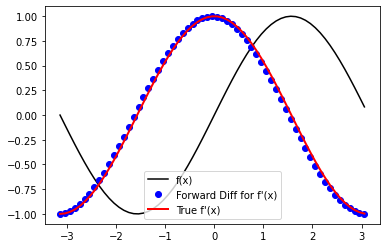

In [51]:
# First decide the "step size"
h = 0.1
# Then plot f(x) at all of the points at which we will calculate the derivative
xcomputing = np.arange(-np.pi, np.pi, 0.1) # the values at which we will calculate the derivative
plt.plot(xcomputing, f(xcomputing),'k', label='f(x)')

# Now we need to compute the forward-difference formula. It's pretty easy, actually, 
# because we can compute f evaluated at the xcomputing array
forward_diff = (f(xcomputing+h) - f(xcomputing))/h
plt.plot(xcomputing, forward_diff, 'bo',label="Forward Diff for f'(x)")

# Let's also plot the actual derivative to see how close we are
plt.plot(xcomputing, np.cos(xcomputing), 'r', label="True f'(x)", lw=2)
plt.legend()

But we already knew the answer. What about if we have data instead of a function?

First we need to talk about how to load data. Data is usually passed around using "csv" files. To load them we can use the following command.

In [52]:
M = np.genfromtxt('deriv_data.csv', delimiter=',')
print(M)
print(type(M))

[[ -2.      -1.9     -1.8     -1.7     -1.6     -1.5     -1.4     -1.3
   -1.2     -1.1     -1.      -0.9     -0.8     -0.7     -0.6     -0.5
   -0.4     -0.3     -0.2     -0.1      0.       0.1      0.2      0.3
    0.4      0.5      0.6      0.7      0.8      0.9      1.       1.1
    1.2      1.3      1.4      1.5      1.6      1.7      1.8      1.9
    2.       2.1      2.2      2.3      2.4      2.5      2.6      2.7
    2.8      2.9      3.       3.1      3.2      3.3      3.4      3.5
    3.6      3.7      3.8      3.9      4.    ]
 [ 32.      26.0991  20.9536  16.5011  12.6816   9.4375   6.7136   4.4571
    2.6176   1.1471   0.      -0.8669  -1.4944  -1.9209  -2.1824  -2.3125
   -2.3424  -2.3009  -2.2144  -2.1069  -2.      -1.9129  -1.8624  -1.8629
   -1.9264  -2.0625  -2.2784  -2.5789  -2.9664  -3.4409  -4.      -4.6389
   -5.3504  -6.1249  -6.9504  -7.8125  -8.6944  -9.5769 -10.4384 -11.2549
  -12.     -12.6449 -13.1584 -13.5069 -13.6544 -13.5625 -13.1904 -12.4949
  -11.4304 

M is an `ndarray` with two pieces of information. In other words it has two arrays. The first array is the x values and the second array is the y values. We can slice it as follows.

In [53]:
xdata = M[0,:]
ydata = M[1,:]

Let's go ahead and plot that.

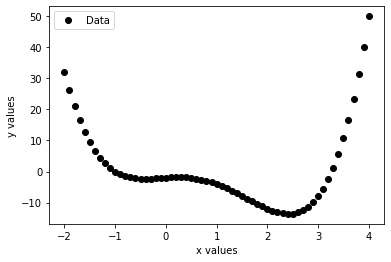

In [54]:
plt.plot(xdata, ydata, 'ko', label='Data')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()

We want to use this data to compute the derivative. We want to save the derivative array to the variable `fp`. We see that the formula says
$$f'(x) \approx \frac{f(x+h)-f(x)}{h}.$$
Now we don't actually have a function $f(x)$. Our $f$ values are stored in the array `ydata` and our $x$ values are stored in the array `xdata`. For data, $h$ is fixed, it is the spacing between the data points we have. We can figure out this spacing by looking at the spacing between the `xdata` array. Since the spacing is consistent (it always will be in the class, when it's not things get trickier, but you can do it!), we can calculate:

In [24]:
h = xdata[1] - xdata[0]
print(h)

0.10000000000000009


This means that if we want $f'$ at our first location, `xdata[0]`, we have
`fp[0] = 1/h*(ydata[1] - ydata[0])`.

In [55]:
ydata.shape

(61,)

In [56]:
# First define fp. We want the derivative at every location where we have the function, so make it the same size.
fp = np.zeros(ydata.shape) # Makes fp the same shape as ydata.
fp[0] = 1/h*(ydata[1] - ydata[0]) # Be careful, this is the derivative at x = -2, not x=0.

In [57]:
fp

array([-59.009,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ])

We can continue to do this point by point, but we can easily see how it is adapted to a loop: `fp[k] = 1/h*(ydata[k+1] - ydata[k])`

In [58]:
for k in range(len(xdata)): # Loop for as many ydata points as there are
    fp[k] = 1/h*(ydata[k+1] - ydata[k])

IndexError: index 61 is out of bounds for axis 0 with size 61

Uh oh, we run into an error. Let's try to debug it:

In [59]:
print(len(fp))
for k in range(len(ydata)): # Loop for as many ydata points as there are
    if k>58: # We see the error is for large k
        print('k=' + str(k))
        print('ydata[k]='+str(ydata[k]))
        print('ydata[k+1]='+str(ydata[k+1])) # This is the line with the error.
    fp[k] = 1/h*(ydata[k+1] - ydata[k])

61
k=59
ydata[k]=40.0771
ydata[k+1]=50.0
k=60
ydata[k]=50.0


IndexError: index 61 is out of bounds for axis 0 with size 61

In [60]:
ydata[60+1]

IndexError: index 61 is out of bounds for axis 0 with size 61

In [30]:
# Can we do this?
#ydata[60+1] # - NO
print(ydata[60])
ydata.shape

50.0


(61,)

The problem is that `ydata[k+1]` is not defined when k = 60. The forward difference formula **needs** to use data points outside of the set of data that we have. Does this mean that we can't compute the derivative of data at all of the points? **No.** There are other derivative methods. We will get to those in the next lecture / activity. For now we can only calculate the derivative up through (but not including) the last endpoint.

In [61]:
for k in range(len(xdata)-1): # Loop for as many ydata points as there are
    fp[k] = 1/h*(ydata[k+1] - ydata[k])

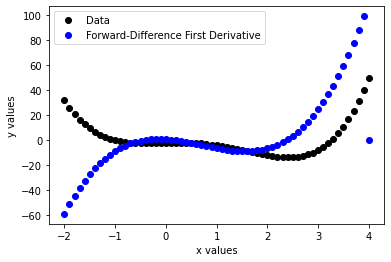

In [62]:
plt.plot(xdata, ydata, 'ko', label='Data')
plt.plot(xdata, fp, 'bo', label='Forward-Difference First Derivative')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()